Text(0.5, 1.0, 'Summer - original color image')

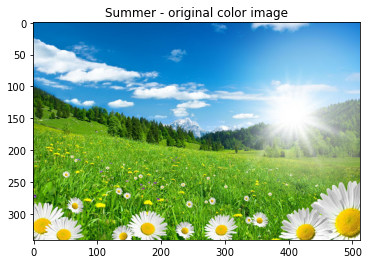

In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
img = cv2.imread("summer.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Summer - original color image")

Text(0.5, 1.0, 'Summer - white mask')

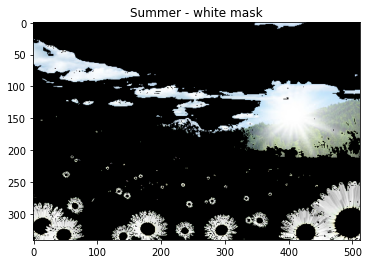

In [3]:
# Сегментация изображения
hsv_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

light_white = (0, 0, 100)
dark_white = (145, 60, 255)

# Применение белой маски
mask_white = cv2.inRange(hsv_image, light_white, dark_white)
result = cv2.bitwise_and(img, img, mask=mask_white)

plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title("Summer - white mask")

Text(0.5, 1.0, 'Contours')

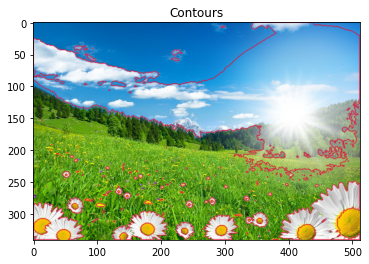

In [4]:
# Обнаружение и отображение контуров
#hsv_min = np.array((2, 28, 65), np.uint8)
#hsv_max = np.array((26, 238, 255), np.uint8)
#temp = cv2.inRange(hsv_image, hsv_min, hsv_max)
#contours, hierarchy = cv2.findContours(temp.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
temp = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)   #Для лучшего обнаружения - ч/б и блюр
blurred = cv2.GaussianBlur(temp, (3, 3), 0)
T, binary_img = cv2.threshold(blurred, 155, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(binary_img.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Отображение контуров поверх изображения
cv2.drawContours(img, contours, -1, (60,20,220), 1, cv2.LINE_AA, hierarchy, 5)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Contours')

Text(0.5, 1.0, 'Canny')

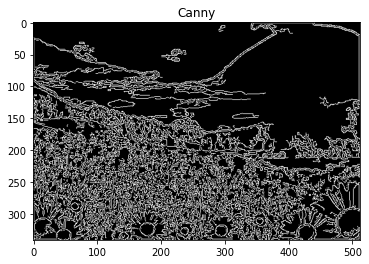

In [5]:
# Использование функции Canny
edges = cv2.Canny(img,1,300,L2gradient=False)
plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
plt.title('Canny')